# Challenge 2: Binary Detection 2

The first step is to import relevant libraries.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The second step is to import data from the given file. I first seperate the data points with and without labels as Training and Test dataframes respectively.

In [119]:
df = pd.DataFrame.from_csv("/home/amrita95/Documents/ECEN662-Spring2018-master/"
                           "Challenges/2Challenge/2challenge_old.csv")

dftrain = df.loc[((df['label'] == 0.0) | (df['label'] == 1.0))]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(dftrain.shape)
print(dftest.shape)



(10000, 9)
(5000, 9)


To fill the Nan values of the train and test dataframe, I calculate the mean of all columns of both train and test data seperately and then filled the NaN values with the mean. 

In [120]:
dftrain = dftrain.fillna(dftest.mean())
dftest = dftest.fillna(dftest.mean())

print(dftrain.head())



         Y0        Y1        Y2        Y3        Y4        Y5        Y6  \
0  0.514048  0.506443  0.289202  0.575041  0.271430  0.320784  0.607147   
1  0.631718  0.464674  0.440586  0.100501  0.459672  0.218364  0.214542   
2  0.290647  0.382966  0.434269  0.550555  0.809441  0.323740  0.131752   
3  0.557203  0.389029  0.717898  0.260572  0.387505  0.258324  0.607147   
4  0.505602  0.446813  0.694544  0.179592  0.321203  0.373219  0.607147   

         Y7  label  
0  0.605117    0.0  
1  0.202603    0.0  
2  0.179560    0.0  
3  0.605117    0.0  
4  0.605117    0.0  


One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [121]:
TrainingData = dftrain.as_matrix(columns=['Y0', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7'])
Trainlabels = dftrain.as_matrix(columns=['label'])
TestData = dftest.as_matrix(columns=['Y0', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7'])


# Visualization using a scatter plot matrix

Scatter plot matrix displays the scatter plots for each pair of features in the data set. 

/home/amrita95/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in true_divide

/home/amrita95/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



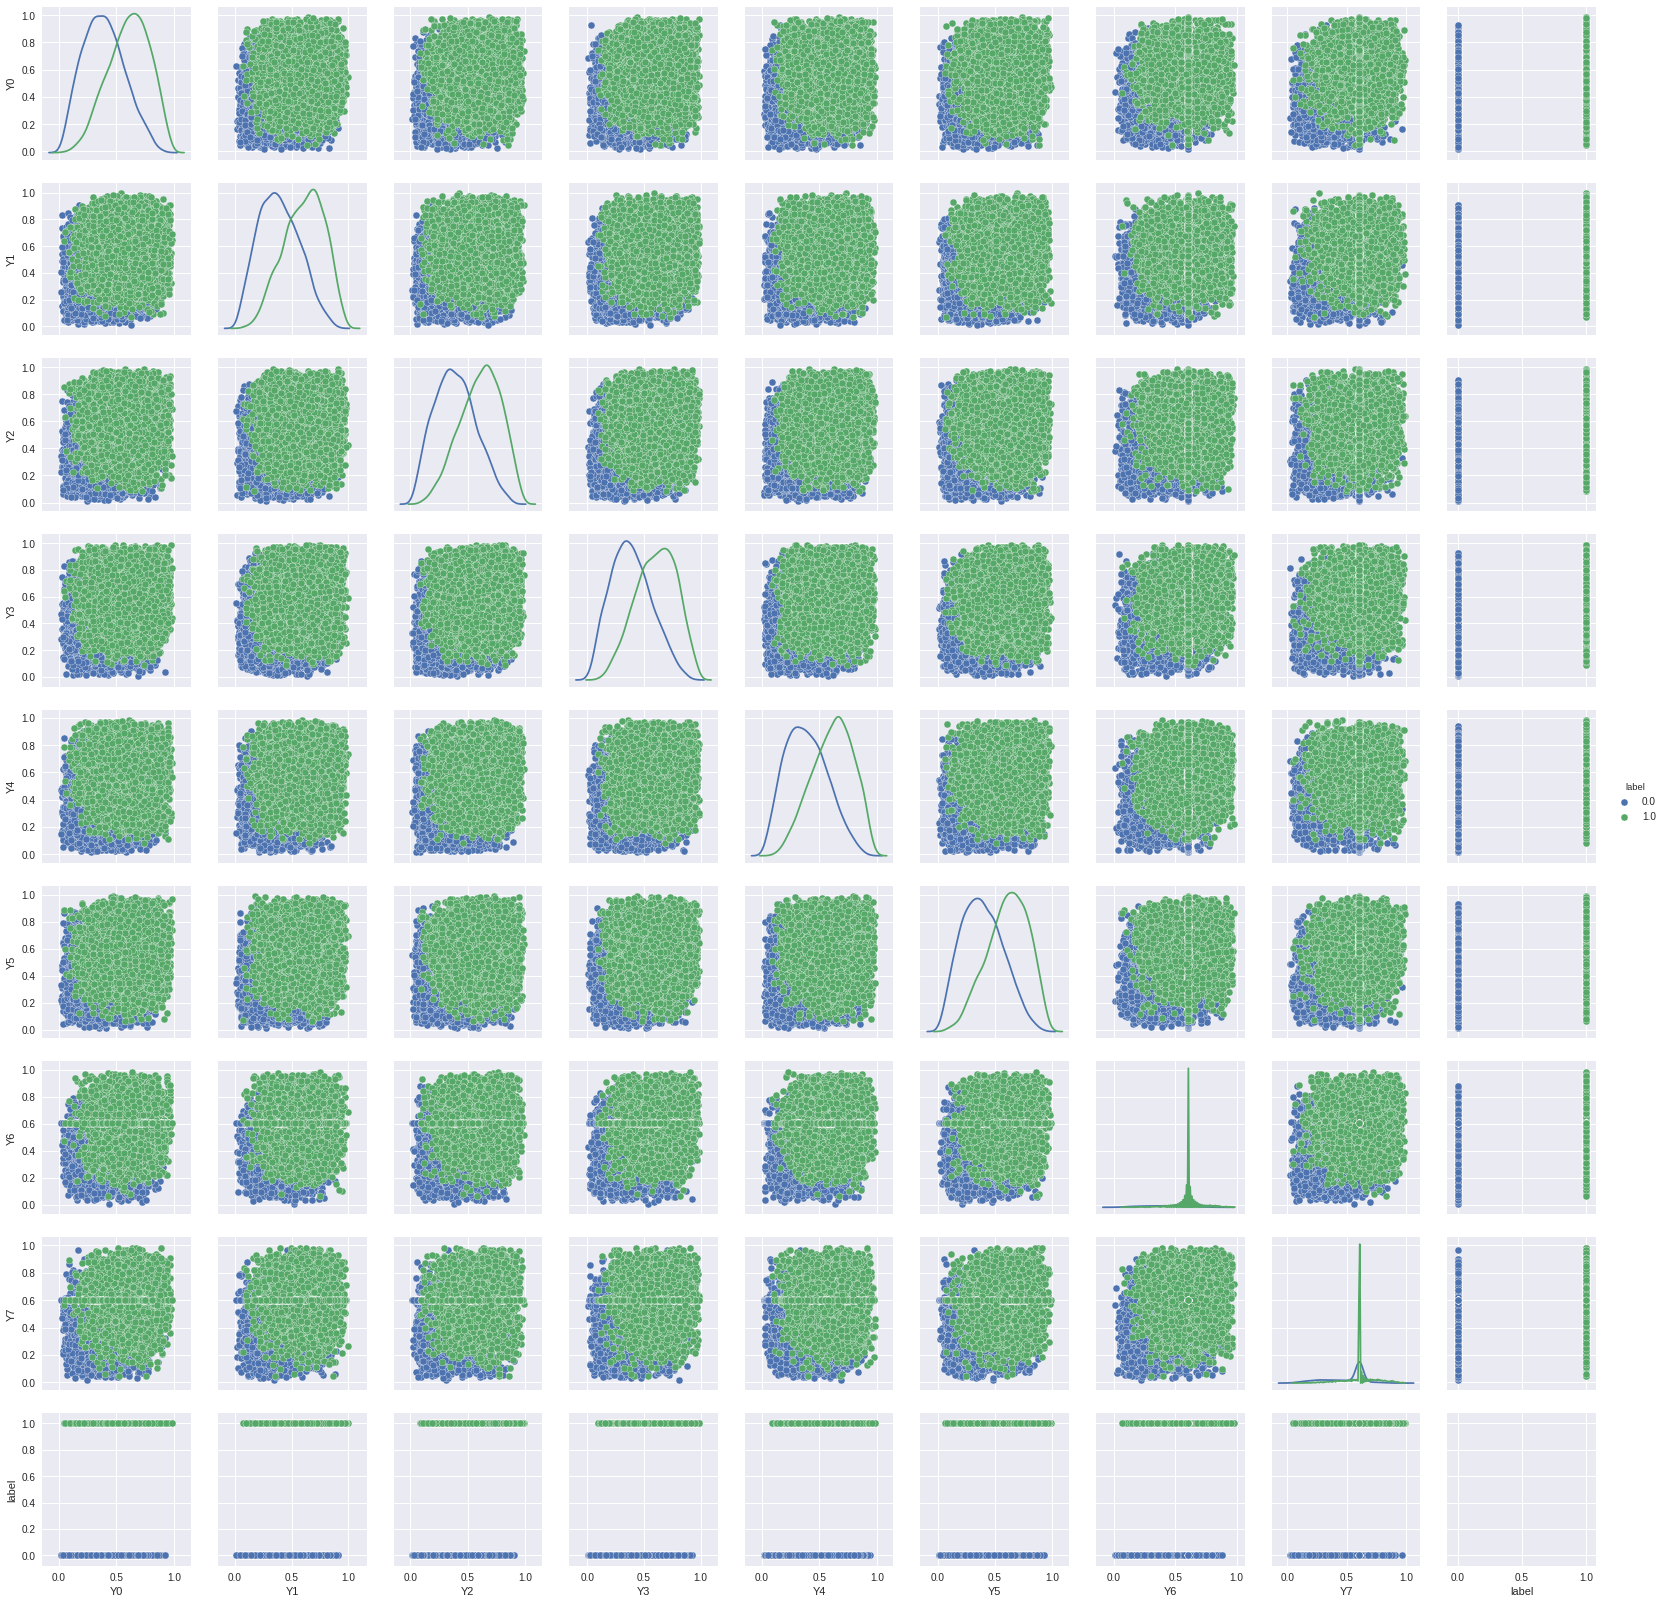

In [122]:
import seaborn as sns
grid = sns.pairplot(dftrain,hue='label',diag_kind='kde')
plt.show()

# Classifiers

To choose between classifiers I am using cross validation of 10 folds and training different classifiers like Gaussian NB, Random Forest, KNN and SVM. 

In [123]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)



In [124]:
model = GaussianNB()
results = cross_val_score(model, TrainingData, Trainlabels.ravel(), cv=kfold)
print("Accuracy of Gaussian NB: %.3f%% " % (results.mean()*100.0))

model = LinearSVC()
results = cross_val_score(model, TrainingData, Trainlabels.ravel(), cv=kfold)
print("Accuracy of SVM: %.3f%% " % (results.mean()*100.0))

model = RandomForestClassifier(n_estimators=20)
results = cross_val_score(model, TrainingData, Trainlabels.ravel(), cv=kfold)
print("Accuracy of Random Forest : %.3f%% " % (results.mean()*100.0))

model = KNeighborsClassifier(n_neighbors=25)
results = cross_val_score(model, TrainingData, Trainlabels.ravel(), cv=kfold)
print("Accuracy of KNN : %.3f%% " % (results.mean()*100.0))

Accuracy of Gaussian NB: 92.080% 
Accuracy of SVM: 92.720% 
Accuracy of Random Forest : 91.610% 
Accuracy of KNN : 92.100% 


As we can see SVM performs the best on cross validation of training data with an average accuracy of 92.72%
Therefore, for the predictions of test data labels I go with the SVM model

In [125]:
model = svm.SVC()
model.fit(TrainingData, Trainlabels.ravel())
testlabels = model.predict(TestData)
testlabels = np.reshape(testlabels,[np.shape(testlabels)[0],-1])
TestData = np.hstack((TestData,testlabels))


In [126]:
dftest = pd.DataFrame(TestData,columns=['Y0', 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','label'])
df = pd.concat([dftrain, dftest], join='outer', ignore_index=True)


In [127]:
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(9695, 9)
(5305, 9)
(0, 9)


In [131]:
df.to_csv("/home/amrita95/Documents/ECEN662-Spring2018-master/Challenges/2Challenge/2challenge.csv")






